<a href="https://colab.research.google.com/github/nicolas-pavon/DSP/blob/master/Entrega%202/Filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
FILEID = '1R9SkR-JaodnBOB7Kjy_UxuVTn5UAvnwv'
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O output.wav && rm -rf /tmp/cookies.txt

--2020-05-27 16:42:11--  https://docs.google.com/uc?export=download&confirm=&id=1R9SkR-JaodnBOB7Kjy_UxuVTn5UAvnwv
Resolving docs.google.com (docs.google.com)... 108.177.12.101, 108.177.12.138, 108.177.12.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.12.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-24-docs.googleusercontent.com/docs/securesc/f1qa80dfdipb10dcr3o0sedancefc6rp/p2u48np0srtfn3be5esgmcjm9o6nktq2/1590597675000/02524034632360142110/13526894380524358219Z/1R9SkR-JaodnBOB7Kjy_UxuVTn5UAvnwv?e=download [following]
--2020-05-27 16:42:12--  https://doc-0s-24-docs.googleusercontent.com/docs/securesc/f1qa80dfdipb10dcr3o0sedancefc6rp/p2u48np0srtfn3be5esgmcjm9o6nktq2/1590597675000/02524034632360142110/13526894380524358219Z/1R9SkR-JaodnBOB7Kjy_UxuVTn5UAvnwv?e=download
Resolving doc-0s-24-docs.googleusercontent.com (doc-0s-24-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to

In [0]:
! pip install soundfile

In [0]:
import soundfile as sf 
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)

# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


Audio original output.wav...:

<audio src="output.wav" controls>Your browser does not support the audio element.</audio>
[output.wav](output.wav)

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


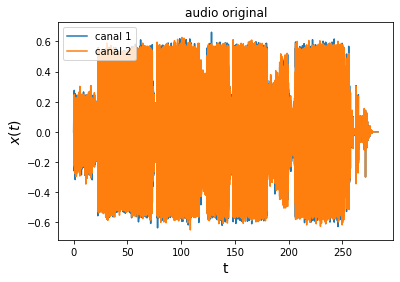

In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

xpro = x.copy()
Num = np.size(xpro,0)
T = Num/fs
tc = np.linspace(0,T-1/fs,Num)

plt.plot(tc,xpro)
plt.legend(('canal 1','canal 2'))
plt.title(r'audio original')
plt.xlabel(r't',fontsize = 14)
plt.ylabel(r'$x(t)$',fontsize = 14)
plt.show()

In [0]:
#Definimos los filtros
from scipy.signal import butter, filtfilt, lfilter, bessel, cheby1, cheby2

def butter_filter(low_cut, high_cut, fs, n, btype):
  nyq = 0.5 * fs
  low = low_cut / nyq
  high = high_cut / nyq
  b, a = butter(n, [low, high], btype)
  return b, a

def cheby_filter(low_cut, high_cut, fs, n, btype, rp):
  nyq = 0.5 * fs
  low = low_cut / nyq
  high = high_cut / nyq
  b, a = cheby1(n, rp, [low, high], btype)
  return b, a

def cheby2_filter(low_cut, high_cut, fs, n, btype, rs):
  nyq = 0.5 * fs
  low = low_cut / nyq
  high = high_cut / nyq
  b, a = cheby2(n, rs, [low, high], btype)
  return b, a

def bessel_filter(low_cut, high_cut, fs, n, btype):
  nyq = 0.5 * fs
  low = low_cut / nyq
  high = high_cut / nyq
  b, a = bessel(n, [low, high], btype)
  return b, a
    
def lfilt(b, a, data):
  y = lfilter(b,a,data,axis=0)
  return y



### Butter filter

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


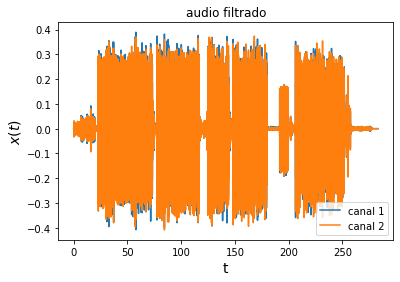

In [0]:
#Filtramos la señal


low_cut = 50
high_cut = 100
n = 2
btype = 'band'
b, a = butter_filter(low_cut, high_cut, fs, n, btype)

xpro_lfil = lfilt(b, a, xpro)

# Graficamos la señal filtrada

Num = np.size(xpro_lfil,0)
T = Num/fs
tc = np.linspace(0,T-1/fs,Num)

plt.plot(tc,xpro_lfil)
plt.legend(('canal 1','canal 2'))
plt.title(r'audio filtrado')
plt.xlabel(r't',fontsize = 14)
plt.ylabel(r'$x(t)$',fontsize = 14)
plt.show()

### Bessel filter

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


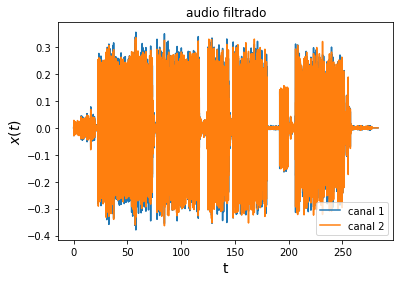

In [0]:
b, a = bessel_filter(low_cut, high_cut, fs, n, btype)

xpro_lfil_be = lfilt(b, a, xpro)

# Graficamos la señal filtrada

Num = np.size(xpro_lfil_be,0)
T = Num/fs
tc = np.linspace(0,T-1/fs,Num)

plt.plot(tc,xpro_lfil_be)
plt.legend(('canal 1','canal 2'))
plt.title(r'audio filtrado')
plt.xlabel(r't',fontsize = 14)
plt.ylabel(r'$x(t)$',fontsize = 14)
plt.show()

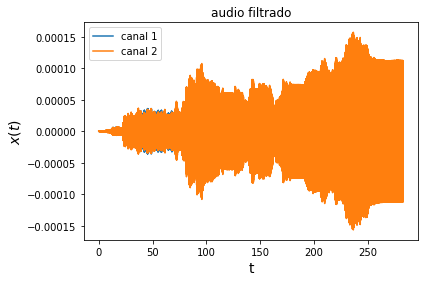

In [0]:
rp = 100
b, a = cheby_filter(low_cut, high_cut, fs, n, btype, rp)

xpro_lfil_ch1 = lfilt(b, a, xpro)

# Graficamos la señal filtrada

Num = np.size(xpro_lfil_ch1,0)
T = Num/fs
tc = np.linspace(0,T-1/fs,Num)

plt.plot(tc,xpro_lfil_ch1)
plt.legend(('canal 1','canal 2'))
plt.title(r'audio filtrado')
plt.xlabel(r't',fontsize = 14)
plt.ylabel(r'$x(t)$',fontsize = 14)
plt.show()

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


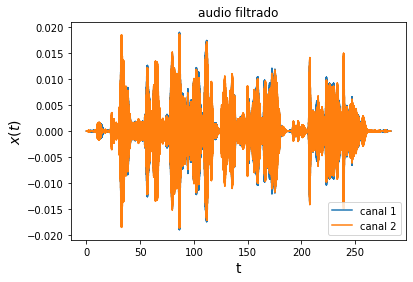

In [0]:
rs = 100
b, a = cheby2_filter(low_cut, high_cut, fs, n, btype, rs)

xpro_lfil_ch2 = lfilt(b, a, xpro)

# Graficamos la señal filtrada

Num = np.size(xpro_lfil_ch2,0)
T = Num/fs
tc = np.linspace(0,T-1/fs,Num)

plt.plot(tc,xpro_lfil_ch2)
plt.legend(('canal 1','canal 2'))
plt.title(r'audio filtrado')
plt.xlabel(r't',fontsize = 14)
plt.ylabel(r'$x(t)$',fontsize = 14)
plt.show()